In [1]:
# forecast the sales for 1 year for the furniture products category
# on the basis of historical data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r'/Users/yusufkhan/Desktop/Datasets/Time Series Modelling/Sample - Superstore.xls',header=0)
df.head()
# sheet_name="sheet2" to load different sheet

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape

(9994, 21)

In [13]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [23]:
furniture = df[df["Category"]=='Furniture']

In [25]:
furniture.shape

(2121, 21)

In [27]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
#furniture['Order Date']=pd.to_datetime(furniture['Order date'])

In [29]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [31]:
furniture=furniture[['Order Date','Sales']]

In [35]:
furniture.shape

(2121, 2)

In [37]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [41]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [47]:
furniture.head(10)# as we see there are multiple sales on single day we will group them

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [51]:
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()
# we groupby by order date and in that we want sales to be summed
# example if there was temprature insted of sales we would have done mean

In [55]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [57]:
furniture.shape

(889, 2)

In [59]:
furniture = furniture.set_index("Order Date")

In [61]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [71]:
y = furniture['Sales'].resample('ME').mean() 
# as we see data given to us on daily basis but data for some days is missing
# so we sapmle it to higher level in our case we resample it to weekly or monthly basis
# we can sample it on bais of sum or mean 
# we use mean so we can discuss it as daliy bais as it gives avegrage

In [73]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

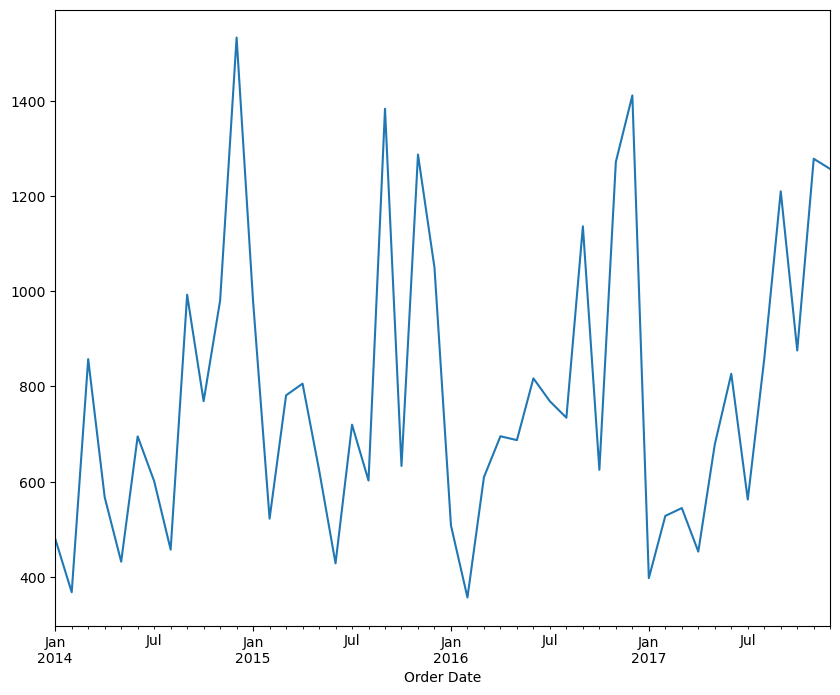

In [79]:
y.plot(figsize=(10,8))
plt.show()

In [81]:
train = y.loc[:'2016-12-31'] # storing three year data for training
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: ME, Name: Sales, dtype: float64

In [83]:
test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: ME, Name: Sales, dtype: float64

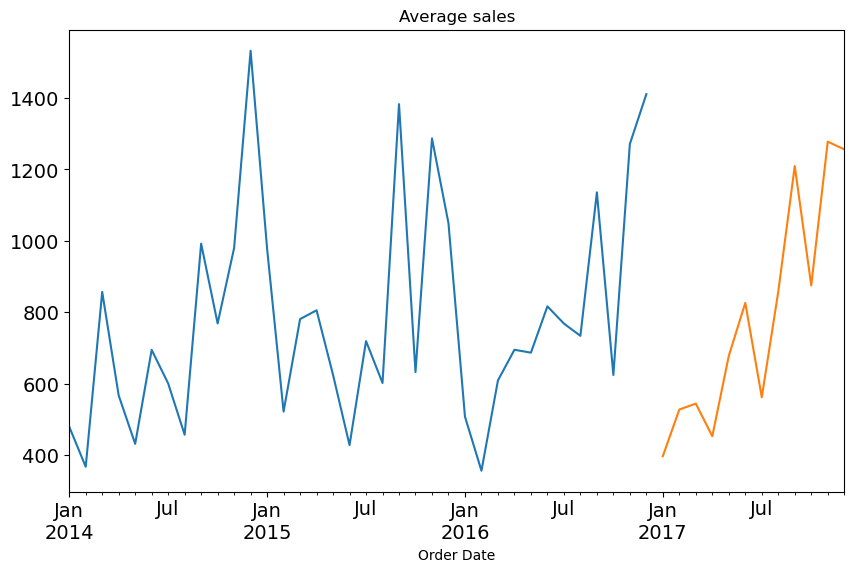

In [87]:
# plotting data
train.plot(figsize=(10,6),title= "Average sales",fontsize=14)
test.plot(figsize=(10,6),title= "Average sales",fontsize=14)
plt.show()

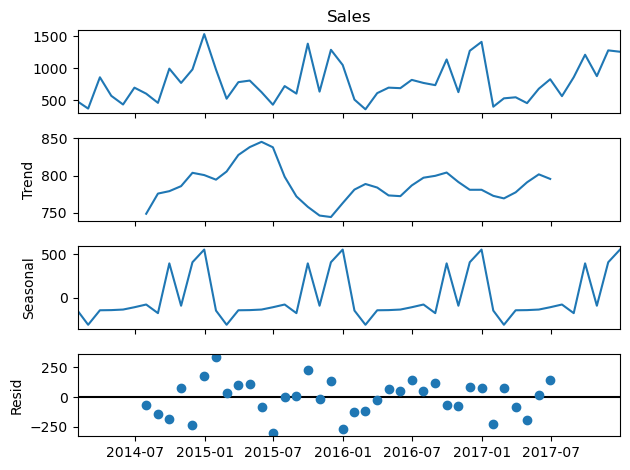

In [89]:
# this helps in analyzing data for trend and seasonality
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


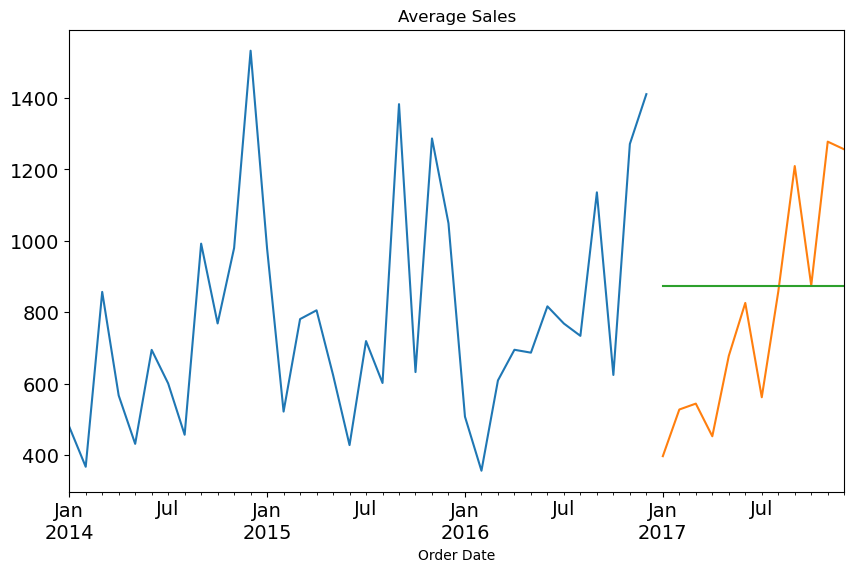

In [99]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()
# sinse our data has seasonality this model is not suitable
# adjust alpha such that aic value is lower, alpha-->smoothing_level

In [101]:
Exp_Smooth.SES

2017-01-31    873.671829
2017-02-28    873.671829
2017-03-31    873.671829
2017-04-30    873.671829
2017-05-31    873.671829
2017-06-30    873.671829
2017-07-31    873.671829
2017-08-31    873.671829
2017-09-30    873.671829
2017-10-31    873.671829
2017-11-30    873.671829
2017-12-31    873.671829
Freq: ME, dtype: float64

In [103]:
fit1.aic

418.97075611710727

In [109]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with Lowest RMSE value 
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse = sqrt(mean_squared_error (test, Exp_Smooth.SES))
print(rmse)

315.0328571018992


/opt/anaconda3/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


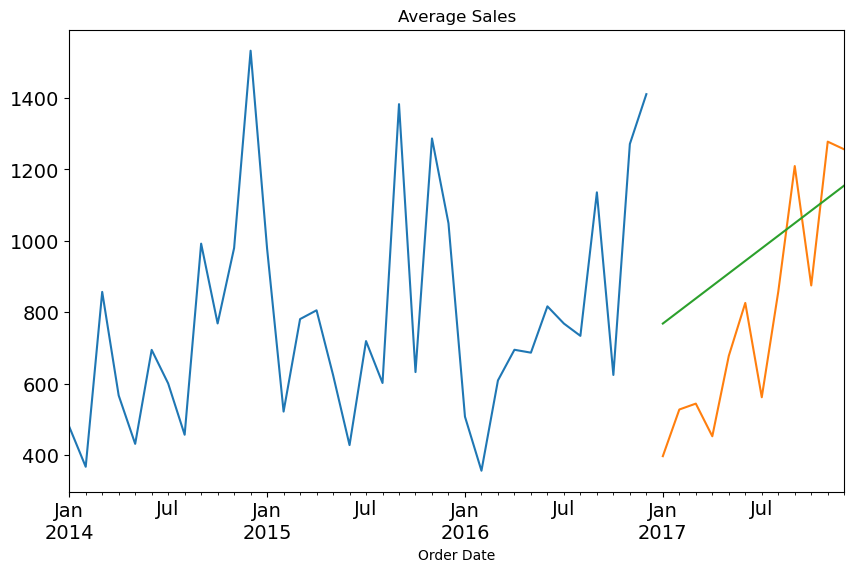

In [117]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()
#adjust alpha and beta such that aic value is lower, alpha-->smoothing_level beta-->smoothing_trend

In [119]:
fit1.aic

448.64214470173863

In [115]:
rmse = sqrt(mean_squared_error (test, Exp_Smooth.SES))
print(rmse)

315.0328571018992


In [ ]:
"""
 
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_trend = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 
"""
 # this test on value of every alpha beta and gamma so we can choose best among them
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""


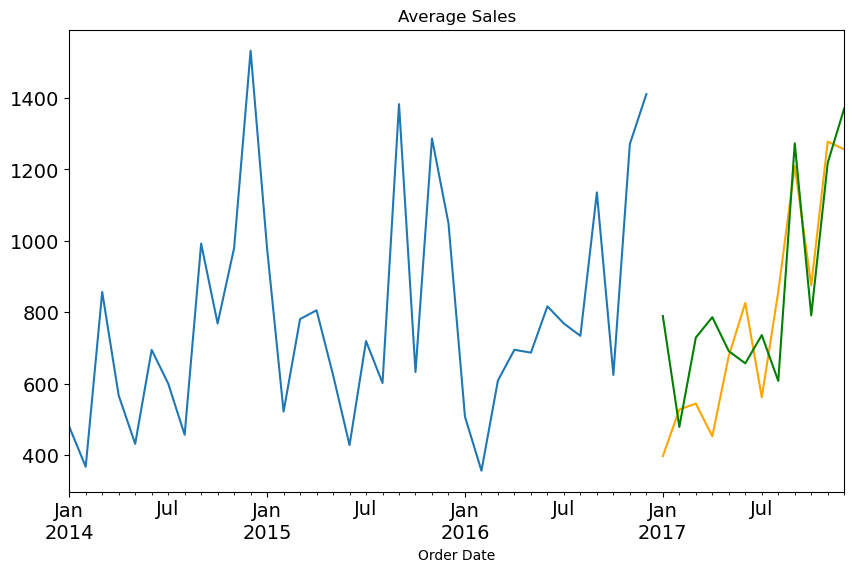

In [137]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="orange")
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="green")
plt.show()

#trend='add'(additive model) when there is no trend and 'mul'(multiplication model) when there is a trend 
# seasonal peroid should be added accurately in our case seasonal pattern repeats every 12 months

In [139]:
fit1.aic

392.39062565903635

In [135]:
Holt_Winter_df["Holt_Winter"]

2017-01-31     710.185216
2017-02-28     459.991937
2017-03-31     792.584480
2017-04-30     720.106189
2017-05-31     617.196325
2017-06-30     662.381687
2017-07-31     725.755602
2017-08-31     638.124896
2017-09-30    1226.478690
2017-10-31     697.884404
2017-11-30    1238.466032
2017-12-31    1385.033732
Freq: ME, dtype: float64

In [141]:
rmse = sqrt(mean_squared_error (test,Holt_Winter_df["Holt_Winter"]))
print(rmse)

193.71153741413733


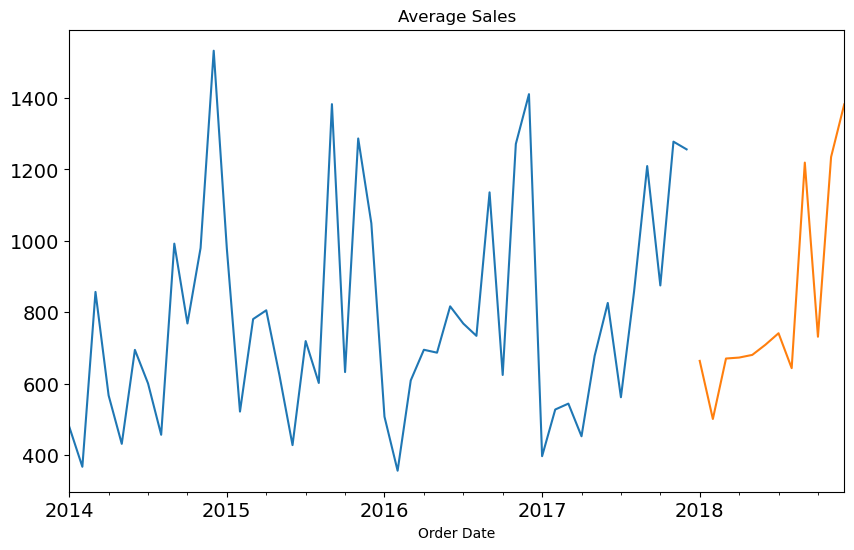

In [143]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fir1.predict(start=pd.to_datetime("2017-01-31))
Y_predictions = fit1.forecast(steps=12)
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [145]:
fit1.aic

513.3610156001187

In [147]:
Y_predictions

2018-01-31     664.267195
2018-02-28     501.695065
2018-03-31     670.884819
2018-04-30     673.545533
2018-05-31     681.013613
2018-06-30     709.431816
2018-07-31     741.612078
2018-08-31     643.909603
2018-09-30    1219.204064
2018-10-31     731.830439
2018-11-30    1234.892534
2018-12-31    1382.092439
Freq: ME, dtype: float64

In [ ]:
#Y_predictions.to_excel("TimeSeriesOutput.xlsx",header=['sales], index=True)
# this is th save the forecasted values

In [149]:
rmse = sqrt(mean_squared_error (test,Y_predictions))
print(rmse)

148.93283801557746


In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [151]:
!pip install pmdarima

In [153]:
import pmdarima as pm

In [155]:
# identification
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.01 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.10 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.03 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.10 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.35 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.68 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.25 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [157]:
model.aic()

489.4176261246745

In [161]:
# estimation
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38928D+00    |proj g|=  2.39517D-02

At iterate    5    f=  4.38507D+00    |proj g|=  8.96767D-04

At iterate   10    f=  4.38498D+00    |proj g|=  5.12521D-03

At iterate   15    f=  4.37211D+00    |proj g|=  7.57467D-02

At iterate   20    f=  4.34477D+00    |proj g|=  3.26355D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   3.332D-05   4.345D+00
  F =   4.3447597997707614     

CONVERG

 This problem is unconstrained.


In [163]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 

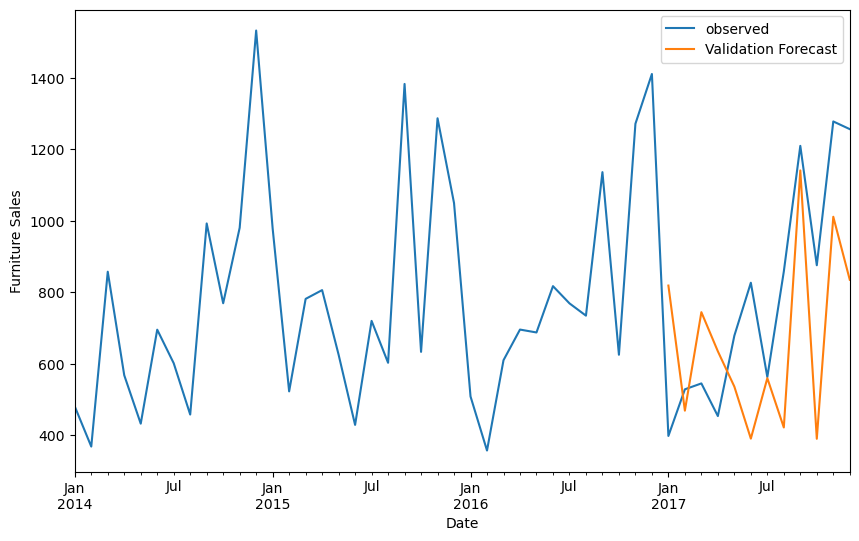

In [165]:
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [182]:
y

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [167]:
pred.predicted_mean

2017-01-31     818.524059
2017-02-28     468.470300
2017-03-31     744.079631
2017-04-30     634.497947
2017-05-31     535.745785
2017-06-30     390.163780
2017-07-31     559.376268
2017-08-31     421.341594
2017-09-30    1140.775338
2017-10-31     389.701088
2017-11-30    1011.052508
2017-12-31     834.732356
Freq: ME, Name: predicted_mean, dtype: float64

In [171]:
# validation
Y_pred = pred.predicted_mean
Y_test = y["2017-01-31":]
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
# this is till 3rd step

308.7697303727197


In [ ]:
#pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales", index=True)
# this is to save the forecasted values

In [ ]:
#now we will forcast on entire data by rebuilding the model on entire data

In [173]:
# forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03652D+00    |proj g|=  1.18400D-01

At iterate    5    f=  5.01243D+00    |proj g|=  1.35824D-03

At iterate   10    f=  5.01235D+00    |proj g|=  5.24288D-03

At iterate   15    f=  5.00601D+00    |proj g|=  3.88910D-02

At iterate   20    f=  4.99396D+00    |proj g|=  5.84154D-03

At iterate   25    f=  4.99393D+00    |proj g|=  1.58700D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.


In [175]:
# forecasting
pred = model.get_forecast(steps=12)

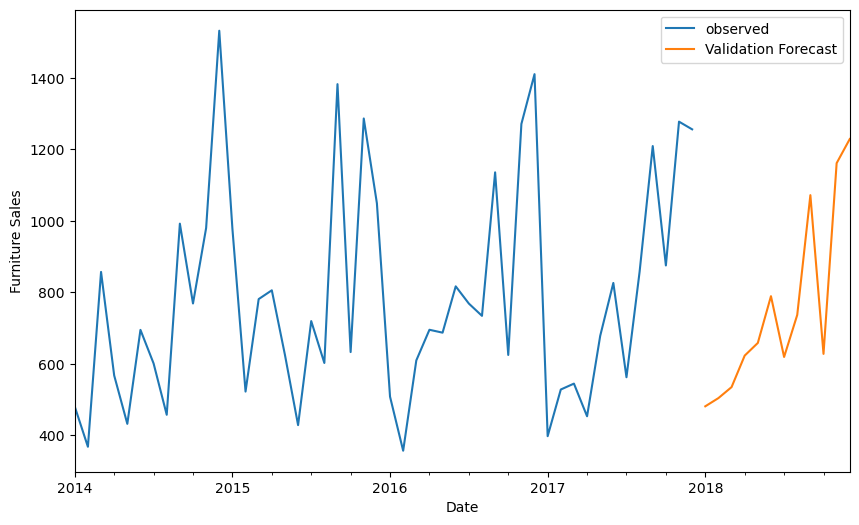

In [177]:
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [179]:
pred.predicted_mean

2018-01-31     481.175783
2018-02-28     504.162670
2018-03-31     534.896812
2018-04-30     623.058251
2018-05-31     658.537448
2018-06-30     789.387676
2018-07-31     619.269519
2018-08-31     736.930521
2018-09-30    1072.136423
2018-10-31     627.864101
2018-11-30    1161.662892
2018-12-31    1229.291165
Freq: ME, Name: predicted_mean, dtype: float64

In [ ]:
#pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales", index=True)
# this is to save the forecasted values

In [ ]:
# out of thw two model holts winter model predicted better